In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [245]:
df = pd.read_csv('superlig.csv')

In [246]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5272 entries, 0 to 5271
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Takım             5272 non-null   object 
 1   matchdate turkce  5272 non-null   object 
 2   Comp Short        5272 non-null   object 
 3   Hafta             5272 non-null   int64  
 4   Season            5272 non-null   int64  
 5   Season long       5272 non-null   object 
 6   Match Date        5272 non-null   object 
 7   Matchid           5272 non-null   object 
 8   Max date          5272 non-null   object 
 9   month turkce      5272 non-null   object 
 10  GD                5272 non-null   int64  
 11  Goals Agst        5272 non-null   int64  
 12  Goals For         5272 non-null   int64  
 13  Maç               5272 non-null   int64  
 14  Points            5272 non-null   int64  
 15  points gd2        5272 non-null   int64  
 16  X Gd              5272 non-null   float64


In [247]:
df.head()

,Takım,matchdate turkce,Comp Short,Hafta,Season,Season long,Match Date,Matchid,Max date,month turkce,GD,Goals Agst,Goals For,Maç,Points,points gd2,X Gd,X Goals Agst,X Goals For,xPoints bucket
0,Akhisarspor,30 Mayıs 2015,TUR,1,1415,2014-15,8/29/2014,BLKAKH1415,5/30/2015,Mayıs,1,1,2,1,3,301,0.560972,0.483106,1.044078,1.832432
1,Akhisarspor,30 Mayıs 2015,TUR,2,1415,2014-15,9/15/2014,AKHSIV1415,5/30/2015,Mayıs,0,2,2,1,1,100,0.026642,0.963886,0.990529,1.350186
2,Akhisarspor,30 Mayıs 2015,TUR,3,1415,2014-15,9/20/2014,KYEAKH1415,5/30/2015,Mayıs,1,1,2,1,3,301,0.833107,0.653289,1.486396,2.209984
3,Akhisarspor,30 Mayıs 2015,TUR,4,1415,2014-15,9/28/2014,AKHFEN1415,5/30/2015,Mayıs,2,0,2,1,3,302,0.048906,1.015609,1.064514,1.350186
4,Akhisarspor,30 Mayıs 2015,TUR,5,1415,2014-15,10.05.14,BSKAKH1415,5/30/2015,Mayıs,-4,4,0,1,0,-4,-1.855734,2.440619,0.584886,0.169811


### Goals per Game vs Points per Game

In [248]:
season = pd.DataFrame(df.groupby(['Season','Goals For'])['Points'].sum() / df.groupby(['Season','Goals For'])['Goals For'].count())

In [249]:
df = pd.DataFrame(df.groupby('Goals For')['Points'].sum() / df.groupby('Goals For')['Goals For'].count())

In [250]:
df.reset_index(inplace=True)

In [251]:
df.rename(columns={'Goals For':'Goals',0:'Points'},inplace=True)

In [355]:
df

,Goals,Points,Marginal Points
0,0,0.275556,0.000000
1,1,1.068330,0.792774
2,2,2.049834,0.981504
3,3,2.673077,0.623243
4,4,2.919786,0.246709
5,5,3.000000,0.080214
6,6,3.000000,0.000000
7,7,3.000000,0.000000


In [451]:
df['Points'].round(2).tolist()

0    0.28
1    1.07
2    2.05
3    2.67
4    2.92
5    3.00
6    3.00
7    3.00
Name: Points, dtype: float64

In [468]:
df['Points'].round(2).tolist()[:6]

[0.28, 1.07, 2.05, 2.67, 2.92, 3.0]

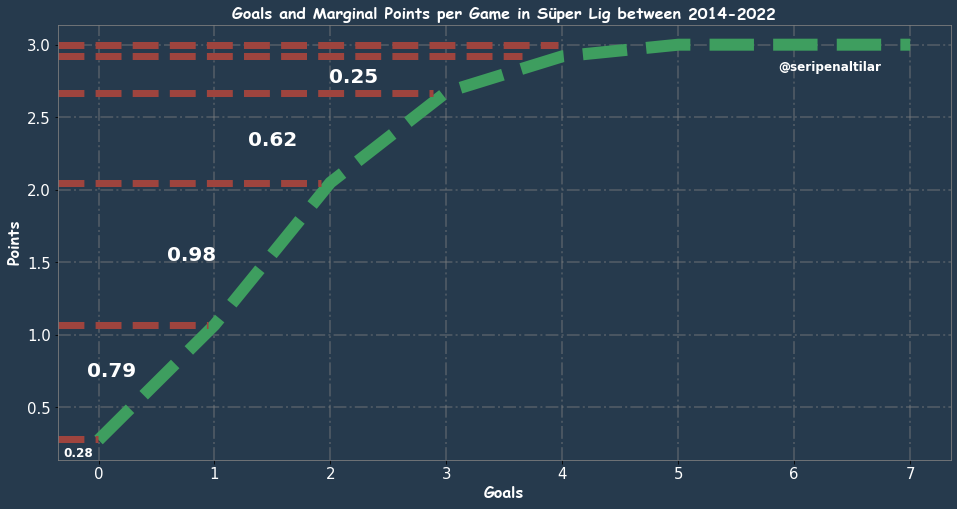

In [538]:
fig,ax = plt.subplots(figsize=(16,8))
fig.patch.set_facecolor('#263a4d')

plt.plot(df['Goals'],df['Points'],lw=12,ls='dashed',c='#3e9e5f')

ax.set_facecolor(color='#263a4d')
ax.spines[['left','bottom','right','top']].set_color('grey')

ax.grid(b = True, color ='grey',
            linestyle ='-.', linewidth = 2,
            alpha = 0.4)

font = {'family': 'Comic Sans MS',
       'color': 'white',
       'weight': 'bold',
       'size': 16
       }

xv = df['Points'].round(2).tolist()[:6]
yv = [0.045,0.168,0.295,0.42,0.52,0.56]
xyv = dict(zip(xv,yv))

for k,v in xyv.items():
    plt.axhline(y=k, xmin=0, xmax=v,lw=7,ls='--',c='#9e443e')


ax.set_xlabel('Goals', fontdict=font)
ax.set_ylabel('Points', fontdict=font)
plt.xticks(fontsize=15,c='white')
plt.yticks(fontsize=15,c='white')
plt.title("Goals and Marginal Points per Game in Süper Lig between 2014-2022",fontdict=font)

plt.figtext(0.75,0.80,"@seripenaltilar",fontsize=12,fontweight='bold',color='white')

val = df['Marginal Points'][1:5].round(2).to_list()
xt = [0.15,0.22,0.29,0.36]
yt = [0.27,0.47,0.67,0.78]

for (a, b, c) in zip(xt, yt, val):
    plt.figtext(a,b,c,fontsize=20,fontweight='bold',color='white')
    
plt.figtext(0.13,0.13,'0.28',fontsize=12,fontweight='bold',color='white')

plt.show()

### Marginal Points

In [254]:
df['Marginal Points']=df.diff()['Points']

In [255]:
df = df.fillna(0)

In [256]:
bar = df[df['Marginal Points']!=0]

In [257]:
bar = bar.round(2)

In [258]:
bar.groupby('Goals')['Marginal Points'].size()

Goals
1    1
2    1
3    1
4    1
5    1
Name: Marginal Points, dtype: int64

In [259]:
def colors_from_values(values, palette_name):
    # normalize the values to range [0, 1]
    normalized = (values - min(values)) / (max(values) - min(values))
    # convert to indices
    indices = np.round(normalized * (len(values) - 1)).astype(np.int32)
    # use the indices to get the colors
    palette = sns.color_palette(palette_name, len(values))
    return np.array(palette).take(indices, axis=0)

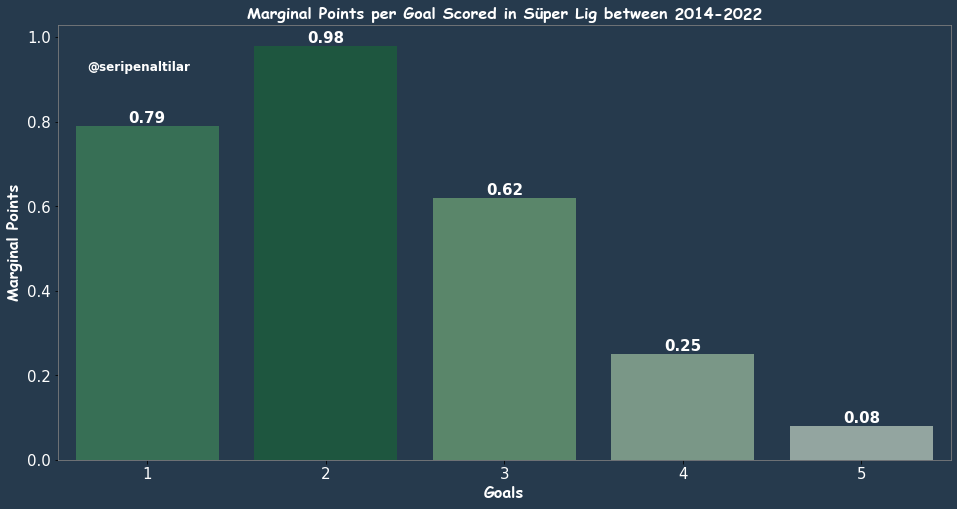

In [260]:
fig,ax = plt.subplots(figsize=(16,8))
fig.patch.set_facecolor('#263a4d')
y = bar['Marginal Points']
ax = sns.barplot(x="Goals", y="Marginal Points", data=bar,palette=colors_from_values(y, "Greens"),alpha=0.6)

ax.set_facecolor(color='#263a4d')
ax.spines[['left','bottom','right','top']].set_color('grey')
ax.bar_label(ax.containers[0],color='white',size=15,fmt='%g',weight='bold')

font = {'family': 'Comic Sans MS',
       'color': 'white',
       'weight': 'bold',
       'size': 16
       }

ax.set_xlabel('Goals', fontdict=font)
ax.set_ylabel('Marginal Points', fontdict=font)
plt.xticks(fontsize=15,c='white')
plt.yticks(fontsize=15,c='white')

plt.title("Marginal Points per Goal Scored in Süper Lig between 2014-2022",fontdict=font)

plt.figtext(0.15,0.80,"@seripenaltilar",fontsize=12,fontweight='bold',color='white')
plt.show()

In [261]:
df

,Goals,Points,Marginal Points
0,0,0.275556,0.000000
1,1,1.068330,0.792774
2,2,2.049834,0.981504
3,3,2.673077,0.623243
4,4,2.919786,0.246709
5,5,3.000000,0.080214
6,6,3.000000,0.000000
7,7,3.000000,0.000000


In [631]:
goal = pd.read_csv('goals.csv')

In [632]:
goal['goal'] = goal.iloc[:,2:].sum(axis=1)

In [633]:
for x in range(1,8):
    goal['Marginal Point'] = df[df['Goals']==x]['Marginal Points'].item() * goal['Goal '+str(x)]

In [634]:
goal

,Player,Team,Goal 1,Goal 2,Goal 3,Goal 4,Goal 5,Goal 6,Goal 7,goal,Marginal Point
0,Umut Bozok,Kasimpasa,4,11,3,2,0,0,0,20,0.0
1,Ayoub El Kaabi,Hatayspor,8,5,2,3,0,0,0,18,0.0
2,Mario Balotelli,Adana Demirspor,4,6,4,2,0,1,1,18,0.0
3,Joel Pohjanpalo,Rizespor,8,5,2,0,0,1,0,16,0.0
4,Andreas Cornelius,Trabzonspor,9,5,1,0,0,0,0,15,0.0
5,Serdar Dursun,Fenerbahce,5,6,2,2,0,0,0,15,0.0
6,Aleksandar Pesic,F. Karagumruk,8,4,2,0,0,0,0,14,0.0
7,Haji Wright,Antalyaspor,7,3,4,0,0,0,0,14,0.0
8,Michy Batshuayi,Besiktas,7,2,4,1,0,0,0,14,0.0
9,Alexandru Maxim,Gaziantepspor,7,5,1,1,0,0,0,14,0.0


In [605]:
goal['Marginal Point'] =  df[df['Goals']==1]['Marginal Points'].item() * goal['Goal 1'] + df[df['Goals']==2]['Marginal Points'].item() * goal['Goal 2'] +df[df['Goals']==3]['Marginal Points'].item() * goal['Goal 3'] + df[df['Goals']==4]['Marginal Points'].item() * goal['Goal 4'] + df[df['Goals']==5]['Marginal Points'].item() * goal['Goal 5'] +df[df['Goals']==6]['Marginal Points'].item() * goal['Goal 6'] +df[df['Goals']==7]['Marginal Points'].item() * goal['Goal 7']

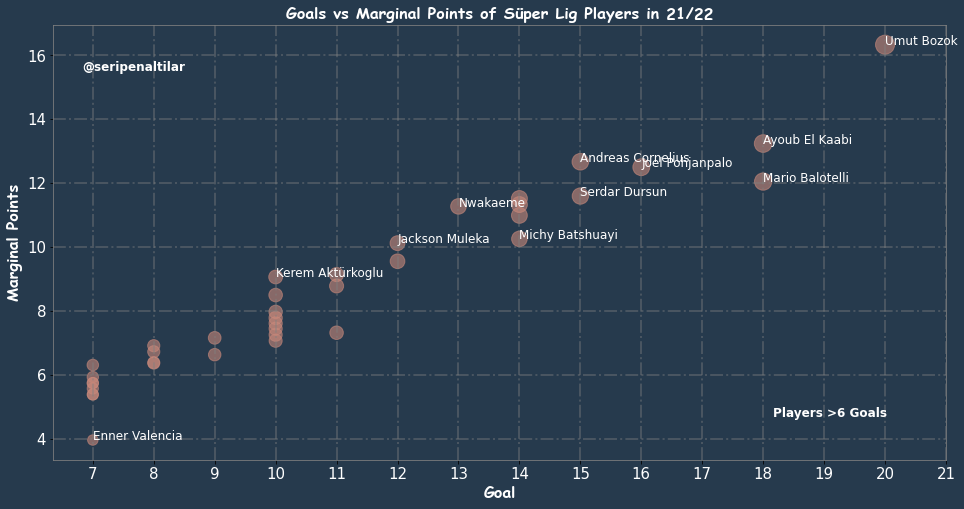

In [607]:
fig, ax = plt.subplots(figsize=(16,8))

fig.patch.set_facecolor('#263a4d')
ax.set_facecolor(color='#263a4d')

ax.scatter(goal['goal'],goal['Marginal Point'],s=(goal['goal'] + goal['Marginal Point'])*10,c='#c9897b',alpha=0.6)

pa = ['Umut Bozok','Jackson Muleka','Mario Balotelli','Michy Batshuayi','Nwakaeme','Serdar Dursun','Andreas Cornelius',
     'Kerem Aktürkoglu','Ayoub El Kaabi','Joel Pohjanpalo','Enner Valencia']

for name in pa:
    ax.annotate(name,(goal[goal['Player']==name]['goal'],goal[goal['Player']==name]['Marginal Point']),c='white',size=12)


ax.spines[['left','bottom','right','top']].set_color('grey')
ax.grid(b=True,color='grey',
       linestyle='-.',linewidth=2,
       alpha=0.4)

font = {'family':'Comic Sans MS',
       'color':'white',
       'weight':'bold',
       'size':16}

ax.set_xlabel('Goal',fontdict=font)
ax.set_ylabel('Marginal Points',fontdict=font)

plt.xticks(np.arange(7,22,1),fontsize=15,c='white')
plt.yticks(fontsize=15,c='white')

plt.title('Goals vs Marginal Points of Süper Lig Players in 21/22',fontdict=font)
plt.figtext(0.15,0.80,"@seripenaltilar",fontsize=12,fontweight='bold',color='white')
plt.figtext(0.75,0.20,"Players >6 Goals",fontsize=12,fontweight='bold',color='white')

plt.show()

In [608]:
goals = goal.iloc[:,[0,9,10]]

In [609]:
goals.set_index('Player',inplace=True)

In [610]:
goals = goals.rename(columns={'goal':'Goals'})

In [611]:
goals['Marginal Point'] = goals['Marginal Point'].round(2)

In [620]:
cm = sns.light_palette("green", as_cmap=True)

display(goals.style.background_gradient(cmap=cm))

,Goals,Marginal Point
Player,,
Umut Bozok,20,16.330000
Ayoub El Kaabi,18,13.240000
Mario Balotelli,18,12.050000
Joel Pohjanpalo,16,12.500000
Andreas Cornelius,15,12.670000
Serdar Dursun,15,11.590000
Aleksandar Pesic,14,11.510000
Haji Wright,14,10.990000
Michy Batshuayi,14,10.250000
